In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize
from astroML import stats as astroMLstats

from astropy.visualization.hist import hist as fancyhist

In [3]:
N = 10000
spin = uniform(0, 1).rvs(N)
M = norm(1, 0.02).rvs(N)

M_irr = M * np.sqrt((1 + np.sqrt(1-spin**2))/2)

f = np.sqrt((1 + np.sqrt(1-spin**2))/2)

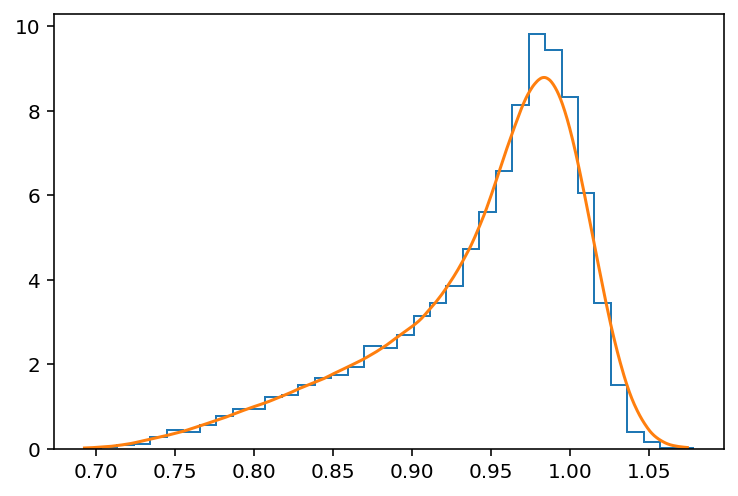

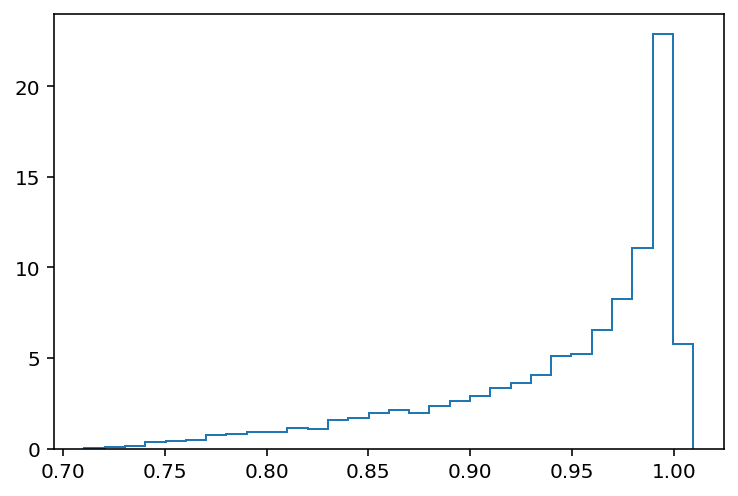

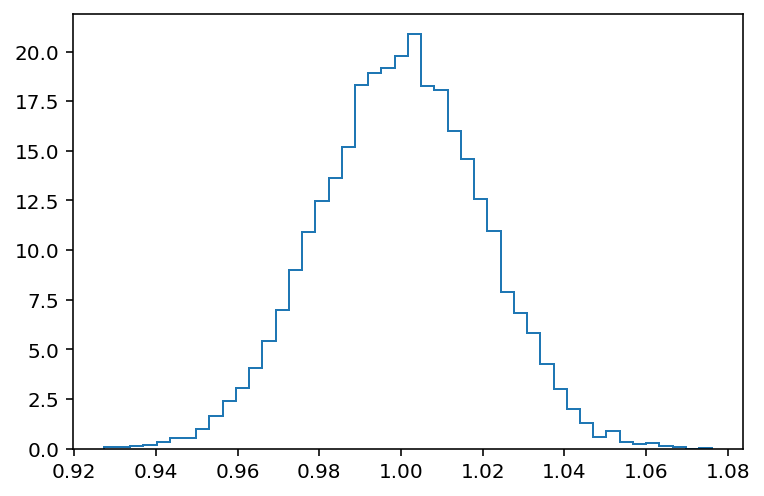

In [4]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M_irr.min(),M_irr.max(),1000)  # Use this instead of 'x' for plotting

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

PDFgaussian = kde_sklearn(M_irr,bandwidth=0.03,kernel="gaussian") 
PDFepanechnikov = kde_sklearn(M_irr,bandwidth=0.03,kernel="epanechnikov") 

counts, bins, bars = fancyhist(M_irr, bins="scott", histtype="step",density=True)

plt.plot(xgrid,PDFepanechnikov)

plt.show()

counts_f, bins_f, bars_f = fancyhist(f, bins="scott", histtype="step",density=True)

plt.show()

counts_M, bins_M, bars_M = fancyhist(M, bins="scott", histtype="step",density=True)

plt.show()

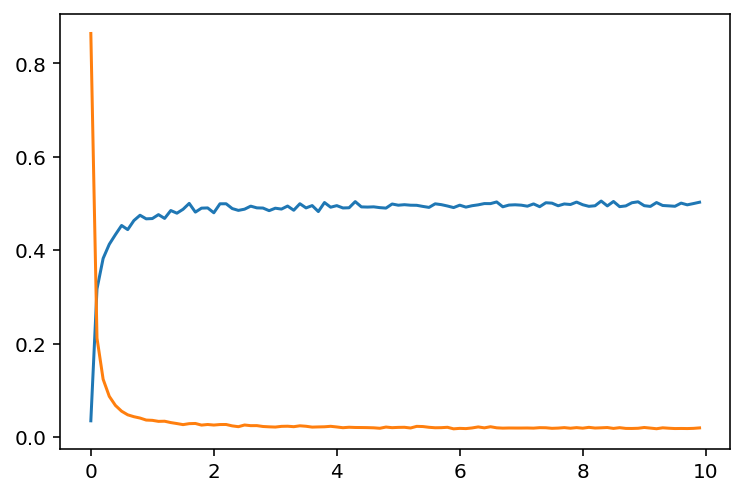

In [7]:
N = 10000
s = np.arange(0.001, 10, 0.1)

ks_M_irr_f = np.zeros(shape = len(s))
ks_M_irr_M = np.zeros(shape = len(s))

for sigma, i in zip(s, range(len(s))):
    
    spin = uniform(0, 1).rvs(N)
    
    M = norm(1, sigma).rvs(N)

    M_irr = M * np.sqrt((1 + np.sqrt(1-spin**2))/2)

    f = np.sqrt((1 + np.sqrt(1-spin**2))/2)

    ks_M_irr_f[i] = stats.kstest(M_irr, f).statistic
    ks_M_irr_M[i] = stats.kstest(M_irr, M).statistic
    
plt.plot(s, ks_M_irr_f)
plt.plot(s, ks_M_irr_M)